In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### I have imported x_train,y_train,x_test,y_test here to use different steps to boost model performance 

In [2]:
x_train = np.load("x_train.npy")

In [3]:
y_train = np.load("y_train.npy")

In [4]:
print(x_train.shape)
print(y_train.shape)

(1224, 27)
(1224,)


In [5]:
x_test = np.load("x_test.npy")

In [6]:
y_test = np.load("y_test.npy")

In [7]:
x = np.concatenate([x_train,x_test])

In [8]:
y = np.concatenate([y_train,y_test])

In [9]:
print(x_test.shape)
print(y_test.shape)

(306, 27)
(306,)


In [10]:
#importing gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold

In [11]:
#import acuuracy metrices
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,recall_score,precision_score,accuracy_score,classification_report,f1_score

In [12]:
from sklearn.metrics import make_scorer

In [13]:
#importing major classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,StackingClassifier,GradientBoostingClassifier

In [14]:
#initializing various classifiers
log = LogisticRegression(max_iter = 10)
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=4)
dt = DecisionTreeClassifier(max_depth = 5)
rf = RandomForestClassifier(n_estimators=200,max_depth=5)
gb = GradientBoostingClassifier(n_estimators=100,max_depth=3)


In [15]:
#creating a dictionary to stores values as different classifiers
d = {"log":log,
    "svm":svm,
    "knn":knn,
    "dt":dt,
    "rf":rf,
    "gb":gb}

In [16]:
#calc y predicted probablities for different classifiers and storing them into a dataframe
df = pd.DataFrame()
for i,j in d.items():
    j.fit(x_train,y_train)
    y_prob = j.predict_proba(x_test)
    y_prob_t = y_prob[:,1]
    df[i]=y_prob_t
    
    

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
df

,log,svm,knn,dt,rf,gb
0,0.087086,0.105401,0.25,0.333333,0.107023,0.109790
1,0.208890,0.105247,0.00,0.148148,0.134808,0.074882
2,0.180349,0.110025,0.25,0.058394,0.163580,0.704238
3,0.043012,0.092391,0.00,0.058394,0.064983,0.037581
4,0.144778,0.103573,0.25,0.148148,0.127545,0.106525
...,...,...,...,...,...,...
301,0.055941,0.104849,0.00,0.058394,0.074421,0.043115
302,0.089318,0.067568,0.00,0.058394,0.077160,0.050264
303,0.192888,0.101968,0.25,0.148148,0.188375,0.117951
304,0.142656,0.106440,0.25,0.333333,0.130369,0.174413


In [18]:
#cal mean of probabilities for an observation
df["avg_proba"] = df.mean(axis = 1)

In [19]:
df

,log,svm,knn,dt,rf,gb,avg_proba
0,0.087086,0.105401,0.25,0.333333,0.107023,0.109790,0.165439
1,0.208890,0.105247,0.00,0.148148,0.134808,0.074882,0.111996
2,0.180349,0.110025,0.25,0.058394,0.163580,0.704238,0.244431
3,0.043012,0.092391,0.00,0.058394,0.064983,0.037581,0.049393
4,0.144778,0.103573,0.25,0.148148,0.127545,0.106525,0.146761
...,...,...,...,...,...,...,...
301,0.055941,0.104849,0.00,0.058394,0.074421,0.043115,0.056120
302,0.089318,0.067568,0.00,0.058394,0.077160,0.050264,0.057117
303,0.192888,0.101968,0.25,0.148148,0.188375,0.117951,0.166555
304,0.142656,0.106440,0.25,0.333333,0.130369,0.174413,0.189535


In [20]:
#fetching the fpr,tpr values for corresponding threshold
fpr,tpr,thres = roc_curve(y_test,df["avg_proba"])

In [21]:
thres

array([       inf, 0.59731966, 0.45754647, 0.38447075, 0.33390007,
       0.31707956, 0.26600305, 0.26280636, 0.25058095, 0.24474722,
       0.24016718, 0.22376685, 0.19781527, 0.19392613, 0.19073446,
       0.18953519, 0.18783635, 0.18668408, 0.18659439, 0.18419903,
       0.1790267 , 0.17386564, 0.16194472, 0.16080692, 0.14678144,
       0.14676148, 0.14642292, 0.14580362, 0.14505325, 0.13019409,
       0.1300069 , 0.1242359 , 0.12273177, 0.11985338, 0.11573752,
       0.1068583 , 0.10587069, 0.10116701, 0.09922867, 0.09388723,
       0.09385503, 0.08746476, 0.08695351, 0.08024873, 0.07955599,
       0.07264731, 0.07213002, 0.0720748 , 0.06528104, 0.06497851,
       0.05983761, 0.05980505, 0.05883924, 0.05883137, 0.0577778 ,
       0.05769358, 0.05712497, 0.05711713, 0.05613231, 0.05611999,
       0.05471806, 0.05467365, 0.05333349, 0.05331404, 0.04817269,
       0.04797477, 0.04781769, 0.04723414, 0.03752596])

In [22]:
## append precision score too

In [23]:
#calculating accuracy for each threshold value
l=[]
for i in thres:
    y_pred = np.where(df["avg_proba"]>i,1,0)
    accu = accuracy_score(y_test,y_pred)
    l.append(accu)

In [24]:
#creating a new dataframe with columns conatinins threshold values and corresponding accuracy scores
thac_df = pd.DataFrame({"thres":thres,"accuracy":l})

In [25]:
thac_df.sort_values(by = "accuracy",ascending=False)

,thres,accuracy
3,0.384471,0.892157
4,0.333900,0.888889
5,0.317080,0.888889
6,0.266003,0.888889
7,0.262806,0.888889
...,...,...
64,0.048173,0.156863
65,0.047975,0.153595
66,0.047818,0.143791
67,0.047234,0.140523


## Roc curve

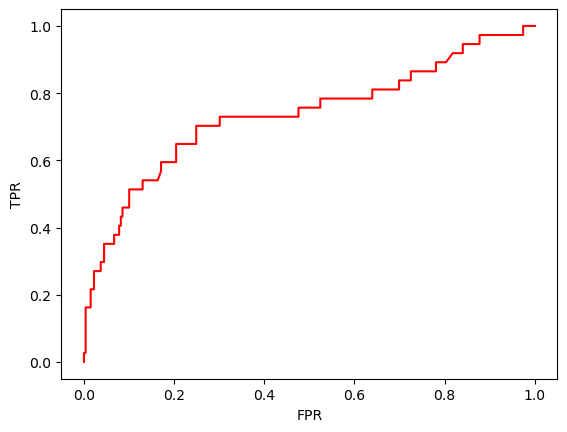

In [29]:
#plotting roc curve false poitive rate against true positive rate
plt.plot(fpr,tpr,color = "red")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [34]:
#changing my default thrreshold as suggested by roc curve and my calculations in previous cells
y_predfi = np.where(df["avg_proba"]>0.271828,1,0)

In [35]:
print(accuracy_score(y_test,y_predfi))
print(confusion_matrix(y_test,y_predfi))



0.8921568627450981
[[265   4]
 [ 29   8]]


In [36]:
df.columns

Index(['log', 'svm', 'knn', 'dt', 'rf', 'gb', 'avg_proba'], dtype='object')

In [47]:
df = df.drop(columns = ["avg_proba"])

# model comaparision

log
[[260   9]
 [ 34   3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       269
           1       0.25      0.08      0.12        37

    accuracy                           0.86       306
   macro avg       0.57      0.52      0.52       306
weighted avg       0.81      0.86      0.83       306



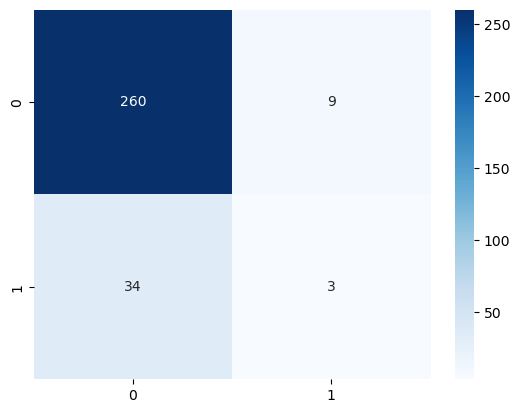


svm
[[266   3]
 [ 32   5]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       269
           1       0.62      0.14      0.22        37

    accuracy                           0.89       306
   macro avg       0.76      0.56      0.58       306
weighted avg       0.86      0.89      0.85       306



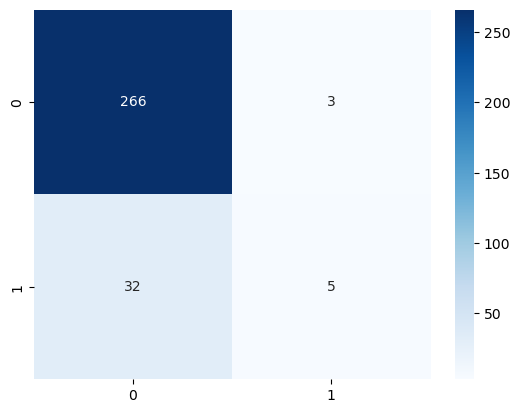


knn
[[252  17]
 [ 28   9]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       269
           1       0.35      0.24      0.29        37

    accuracy                           0.85       306
   macro avg       0.62      0.59      0.60       306
weighted avg       0.83      0.85      0.84       306



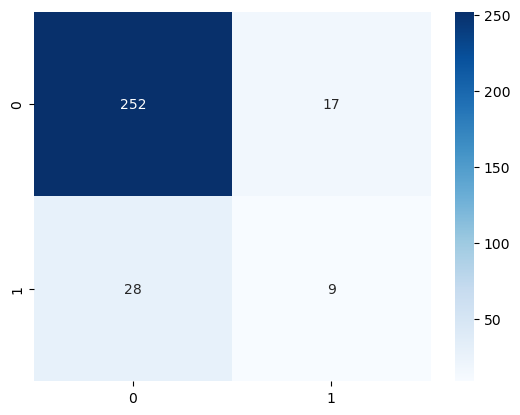


dt
[[255  14]
 [ 27  10]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       269
           1       0.42      0.27      0.33        37

    accuracy                           0.87       306
   macro avg       0.66      0.61      0.63       306
weighted avg       0.85      0.87      0.85       306



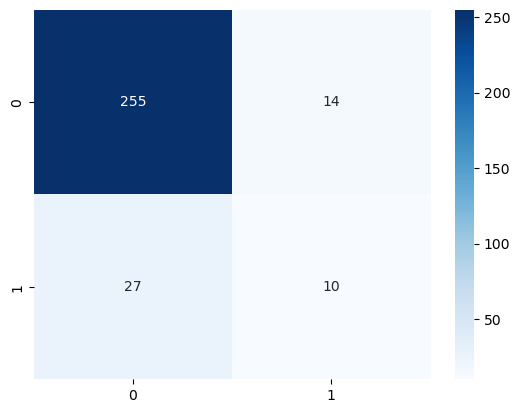


rf
[[266   3]
 [ 33   4]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       269
           1       0.57      0.11      0.18        37

    accuracy                           0.88       306
   macro avg       0.73      0.55      0.56       306
weighted avg       0.85      0.88      0.85       306



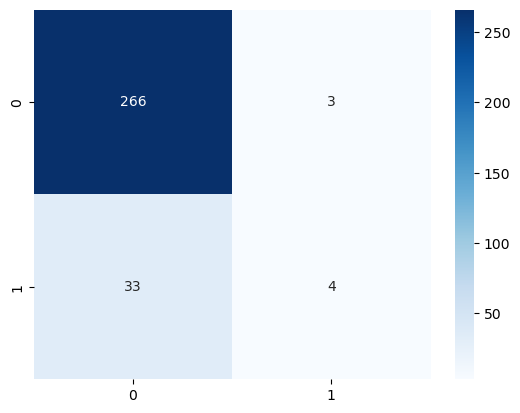


gb
[[256  13]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       269
           1       0.50      0.35      0.41        37

    accuracy                           0.88       306
   macro avg       0.71      0.65      0.67       306
weighted avg       0.86      0.88      0.87       306



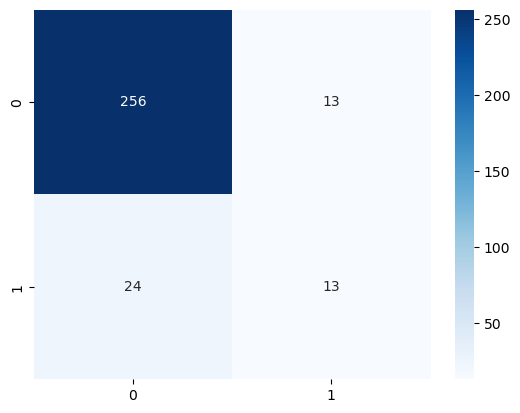

In [48]:
#comparing different models
dic = {}
for i in df.columns:
    df[i]=np.where(df[i]>0.271828,1,0)
    dic[i]=f1_score(y_test,df[i].values,pos_label = 1)
    print("\033[1m{}\033[0m".format(i))
    print(confusion_matrix(y_test,df[i].values))
    print(classification_report(y_test,df[i].values))
    cm = confusion_matrix(y_test, df[i].values)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    print("==============================================================")
    print()

In [49]:
dic

{'log': 0.12244897959183673,
 'svm': 0.2222222222222222,
 'knn': 0.2857142857142857,
 'dt': 0.32786885245901637,
 'rf': 0.18181818181818182,
 'gb': 0.4126984126984127}

In [50]:
prec_df = pd.DataFrame(dic.values(),index = dic.keys(),columns = ["f1_score"])

In [51]:
prec_df

,f1_score
log,0.122449
svm,0.222222
knn,0.285714
dt,0.327869
rf,0.181818
gb,0.412698


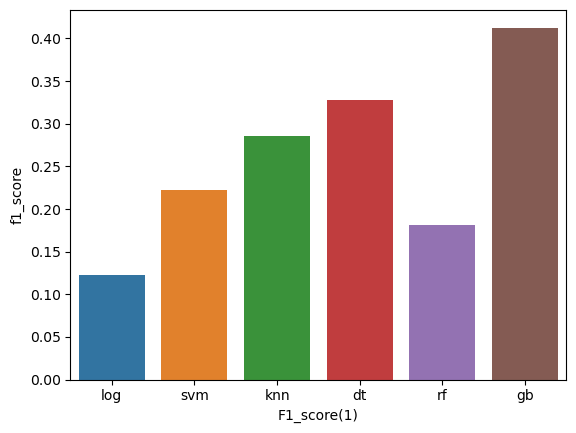

In [56]:
#model comparision through bar plot for f1 score
sns.barplot(prec_df,x=prec_df.index,y="f1_score")
plt.xlabel("F1_score(1)")
plt.show()

# GridsearchCV

### gridsearch cv to find best set of parameters for a particular algorith for a selected classification metrics

In [153]:
#parameter grid for different classification algorithm
lpg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}] 
}

bnpg = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

kpg = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

spg = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

dtg = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}] 
}

rfg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,4,5,6],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}] 
}

gbg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [154]:
#storing parameter grid for different classifier in a dictionary
param_grids = {
    'lr': lpg,
    'bnb': bnpg,
    'kn': kpg,
    'svm': spg,
    'dt':dtg,
    'rf':rfg}


sco = make_scorer(f1_score, pos_label=1)


In [155]:
#initializing different classifiers
log = LogisticRegression()
kn = KNeighborsClassifier()
bnb = BernoulliNB()
sv=SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
#gb = GradientBoostingClassifier()


In [162]:
#initializing gridsearch cv for different classifiers with cross_validation
gsv1 = GridSearchCV(log,lpg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
gsv2 = GridSearchCV(kn,kpg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
gsv3 = GridSearchCV(bnb,bnpg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
gsv4 = GridSearchCV(sv,spg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
gsv5 = GridSearchCV(dt,dtg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
gsv6 = GridSearchCV(rf,rfg,scoring=sco,refit = "f1",cv = 5,n_jobs=-1)
#gsv5 = GridSearchCV(gb,gbpg,cv = 5,n_jobs=-1)

In [157]:
algo = ["logReg","knn","bnb","svm","dt","rf"]

In [158]:
#importing re module
import re

# hypothesis
 

## Random forest classifier would perform much better than Decision tree classifier, KNN,SVM and Logistic regression

##

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _che

0.2978723404255319
0.2962962962962963


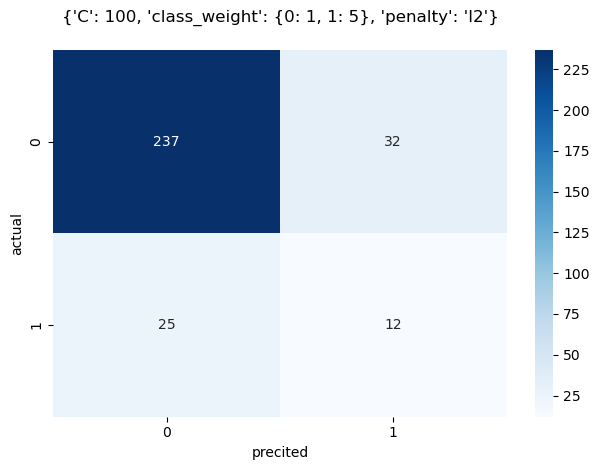

0.9180327868852459
0.5660377358490566


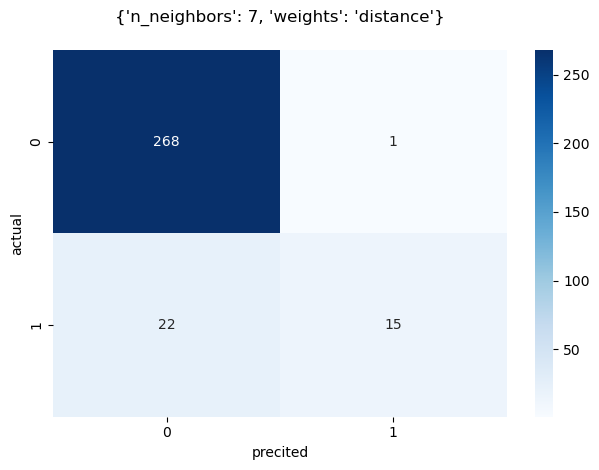

0.15483870967741936
0.1276595744680851


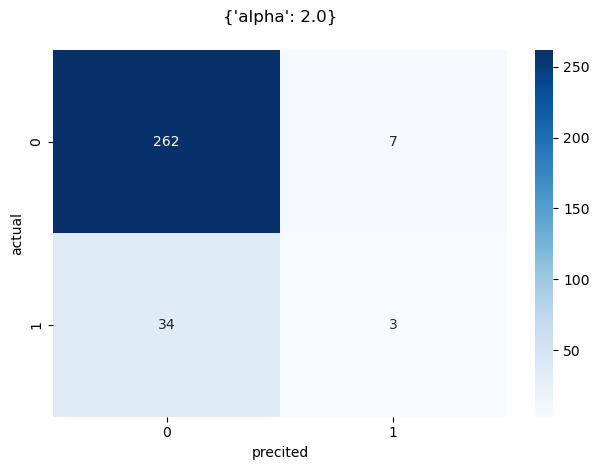

0.1276595744680851
0.14634146341463414


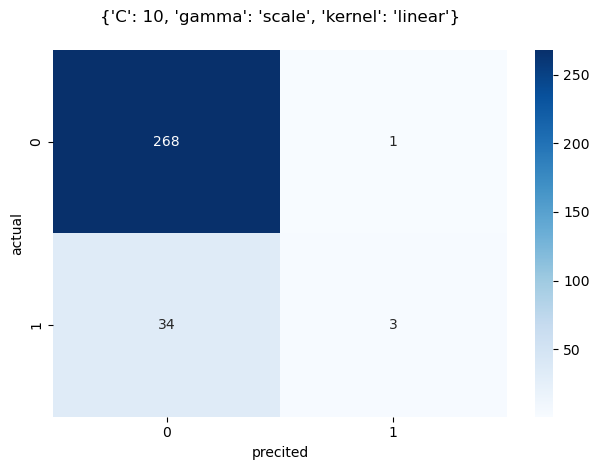

0.8125
0.5052631578947369


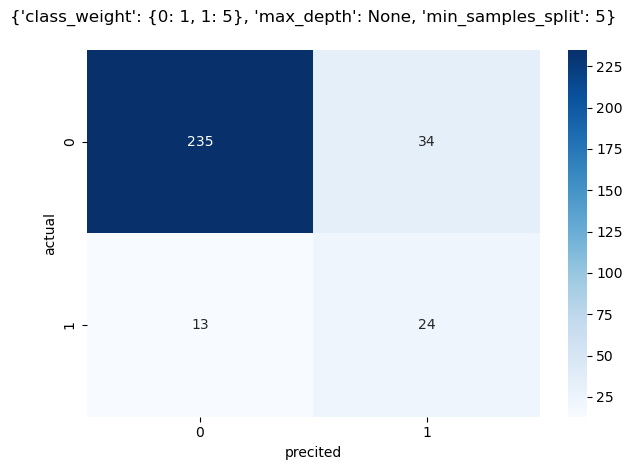

0.9027777777777778
0.6031746031746031


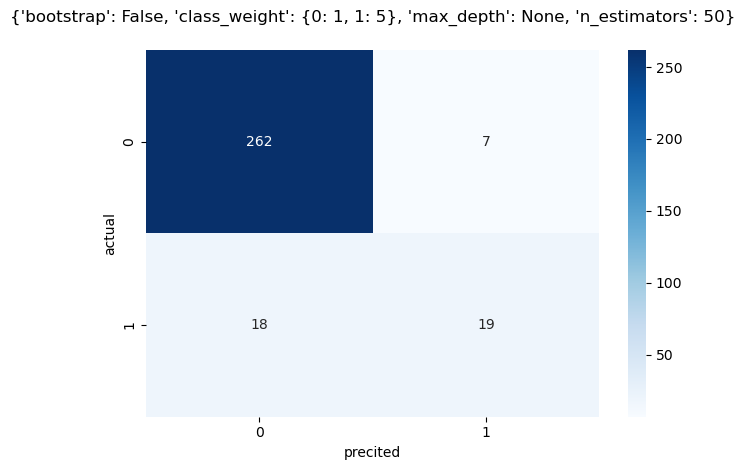

In [159]:
#model comparision- storing all metrics in different list for different algos
zero = []
one = []
re0 = []
re1 = []
fsc0=[]
fsc1=[]

for i in [gsv1,gsv2,gsv3,gsv4,gsv5,gsv6]:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    zero.append(precision_score(y_test,y_pred,average=None)[0])
    one.append(precision_score(y_test,y_pred,average = None)[1])
    re0.append(recall_score(y_test,y_pred,average=None)[0])
    re1.append(recall_score(y_test,y_pred,average = None)[1])
    fsc0.append(f1_score(y_test,y_pred,pos_label=0))
    fsc1.append(f1_score(y_test,y_pred,pos_label=1))
    print(f1_score(y_train, i.predict(x_train),pos_label = 1))
    print(f1_score(y_test,y_pred,pos_label=1))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt = "d",annot = True,cmap ="Blues")
    plt.title(i.best_params_,pad = 20)
    plt.xlabel("precited")
    plt.ylabel("actual")
    plt.tight_layout()
    plt.show()
    print("============================================================================================")

In [163]:
#storing all metrices in a dataframe
prec_df = pd .DataFrame({"algo":algo,"zero_prec":zero,"one_prec":one,"recall_0":re0,"recall_1":re1,"f1_0":fsc0,"f1_1":fsc1})

In [164]:
prec_df

,algo,zero_prec,one_prec,recall_0,recall_1,f1_0,f1_1
0,logReg,0.904580,0.272727,0.881041,0.324324,0.892655,0.296296
1,knn,0.924138,0.937500,0.996283,0.405405,0.958855,0.566038
2,bnb,0.885135,0.300000,0.973978,0.081081,0.927434,0.127660
3,svm,0.887417,0.750000,0.996283,0.081081,0.938704,0.146341
4,dt,0.947581,0.413793,0.873606,0.648649,0.909091,0.505263
5,rf,0.935714,0.730769,0.973978,0.513514,0.954463,0.603175


In [165]:
prec_df.sort_values(by = ["f1_1","f1_0"],ascending = False)

,algo,zero_prec,one_prec,recall_0,recall_1,f1_0,f1_1
5,rf,0.935714,0.730769,0.973978,0.513514,0.954463,0.603175
1,knn,0.924138,0.937500,0.996283,0.405405,0.958855,0.566038
4,dt,0.947581,0.413793,0.873606,0.648649,0.909091,0.505263
0,logReg,0.904580,0.272727,0.881041,0.324324,0.892655,0.296296
3,svm,0.887417,0.750000,0.996283,0.081081,0.938704,0.146341
2,bnb,0.885135,0.300000,0.973978,0.081081,0.927434,0.127660


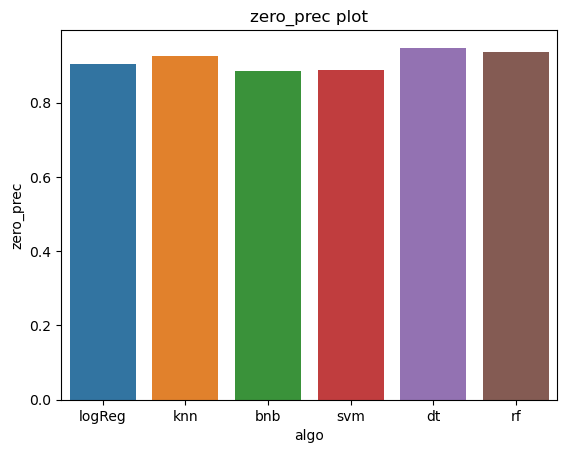

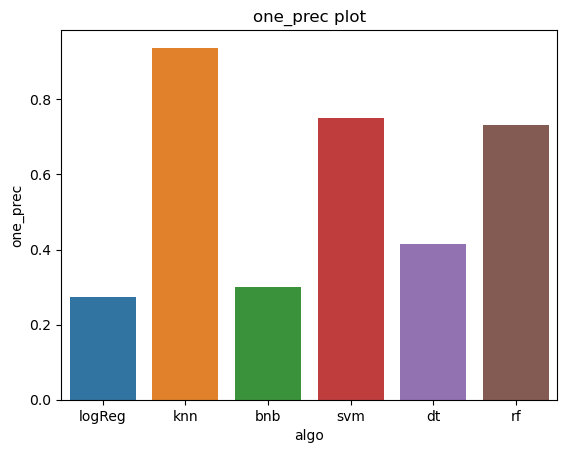

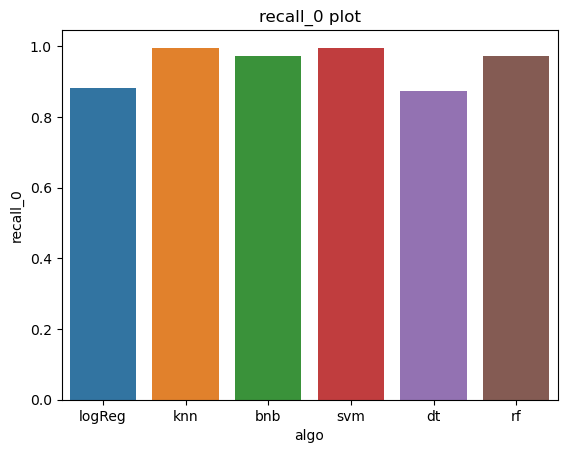

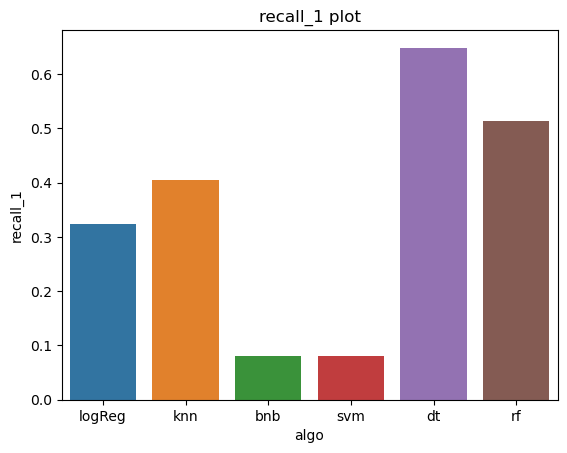

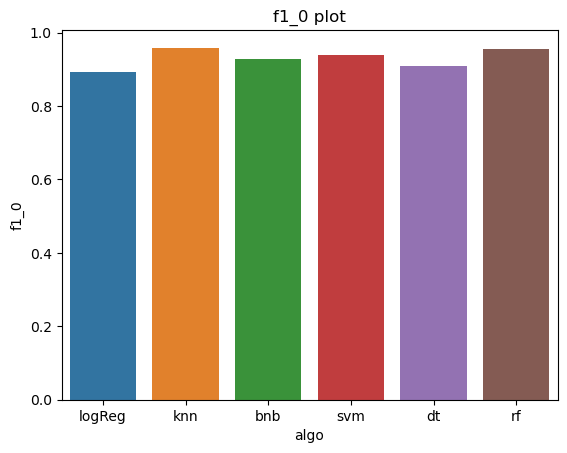

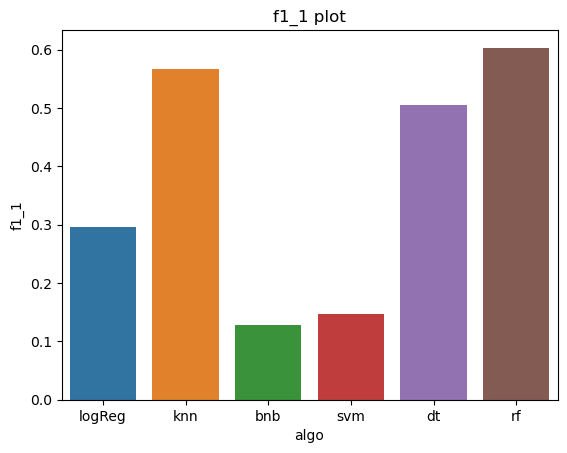

In [166]:
#comapring all metrices for different algos using bar chart
for i in prec_df.columns[1:]:
    sns.barplot(prec_df,x="algo",y=i)
    plt.title(f"{i} plot")
    plt.show()

# hypothesis check
 

## hypothesis
### Random forest classifier would perform much better than Decision tree classifier, KNN,SVM and Logistic regression

## result  
### Random forest algorithm is actually way better than other specified models in hypothesis as validated by model                 comaparison

# grad boosting with tuned hyperparameters

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200,max_depth=5)

In [107]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [108]:
y_pred = gb.predict(x_test)

In [109]:
print("model score:",gb.score(x_train,y_train))
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("===========================================================")
print(confusion_matrix(y_test,y_pred))
print("===========================================================")
print(classification_report(y_test,y_pred))

model score: 0.9820261437908496
accuracy: 0.9183006535947712
precision: 0.7727272727272727
[[264   5]
 [ 20  17]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       269
           1       0.77      0.46      0.58        37

    accuracy                           0.92       306
   macro avg       0.85      0.72      0.77       306
weighted avg       0.91      0.92      0.91       306



## xgboost

In [110]:
#!pip install xgboost

In [111]:
import xgboost as xgb

In [112]:
xg = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=2
)

In [113]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
y_pred = xg.predict(x_test)

In [115]:
print("model score:",xg.score(x_train,y_train))
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("===========================================================")
print(confusion_matrix(y_test,y_pred))
print("===========================================================")
print(classification_report(y_test,y_pred))

model score: 0.9558823529411765
accuracy: 0.8954248366013072
precision: 0.631578947368421
[[262   7]
 [ 25  12]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       269
           1       0.63      0.32      0.43        37

    accuracy                           0.90       306
   macro avg       0.77      0.65      0.69       306
weighted avg       0.88      0.90      0.88       306



# Voting classifier using best params for all algos obtained trough gsv

In [116]:
cw={0: 1, 1: 5}

In [167]:
#initializing different models with best parameter values obtained through gridsearchcv
log = LogisticRegression(C= 0.001, penalty= 'l2')
kn = KNeighborsClassifier(n_neighbors= 9, weights= 'distance')
bnb = BernoulliNB(alpha= 2.0)
sv=SVC(C =10, gamma= 'scale', kernel= 'linear')
dt = DecisionTreeClassifier(class_weight=cw,min_samples_split=2)
rf = RandomForestClassifier(n_estimators=50,bootstrap=False,class_weight="balanced")

In [168]:
#initializing voting classifier
vt = VotingClassifier(estimators=[("kn",kn),("dt",dt),("rf",rf),("xg",xg),("gb",gb)])

In [169]:
#training my data using voting classifier
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(n_neighbors=9,
                                                   weights='distance')),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 5})),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight='balanced',
                                                     n_estimators=50)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gb', GradientBoostingClassifier())])

In [170]:
y_pred = vt.predict(x_test)

In [121]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("===========================================================")
print(confusion_matrix(y_test,y_pred))
print("===========================================================")
print(classification_report(y_test,y_pred))

accuracy: 0.9379084967320261
precision: 0.95
[[268   1]
 [ 18  19]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       269
           1       0.95      0.51      0.67        37

    accuracy                           0.94       306
   macro avg       0.94      0.75      0.82       306
weighted avg       0.94      0.94      0.93       306



### Most appropriate model among all my models would be voting classifier with KNN classifier,      decision tree , random forest, gradient boosting classifier and XG boost classifier as base models.

## Justification for most appropriate model

       1.model has a recall score of almost 1 that is it predicts all 0 outcomes (rejection of application) correctly and               there are very low chances of any type1 error (false positive).
          
       2.model has a recall of around 50 percent for all 1 outcome (acceptance of application). 50% may seem less but with               such small and imbalanced data getting a recall score of 1 for all 0 outcomes and around 50% for 1 outcome was the             best combination that is achieved through this voting classifier model.
